In [80]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [8]:
#importing the csv files
fundamentals = pd.read_csv('/Users/sreenandk/Desktop/ml/VirtualInternship/NYSE_S_P500_FUNDAMENTALS/fundamentals.csv')
prices_split = pd.read_csv('/Users/sreenandk/Desktop/ml/VirtualInternship/NYSE_S_P500_FUNDAMENTALS/prices-split-adjusted.csv')
prices = pd.read_csv('/Users/sreenandk/Desktop/ml/VirtualInternship/NYSE_S_P500_FUNDAMENTALS/prices.csv')
security = pd.read_csv('/Users/sreenandk/Desktop/ml/VirtualInternship/NYSE_S_P500_FUNDAMENTALS/securities.csv')

In [5]:
# An overview of all the datasets
display([fundamentals.shape, prices_split.shape, prices.shape, security.shape])
display(fundamentals.head(), prices_split.head(), prices.head(), security.head())

[(1781, 79), (851264, 7), (851264, 7), (505, 8)]

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [28]:
#Since we have the fundamental dataset lets use this dataset to find out the top healthy companies.
#finding out the null values in fundamental dataset
fundamentals.isnull().sum()

Unnamed0                                        0
TickerSymbol                                    0
PeriodEnding                                    0
AccountsPayable                                 0
AccountsReceivable                              0
Addlincomeexpenseitems                          0
AfterTaxROE                                     0
CapitalExpenditures                             0
CapitalSurplus                                  0
CashRatio                                     299
CashandCashEquivalents                          0
ChangesinInventories                            0
CommonStocks                                    0
CostofRevenue                                   0
CurrentRatio                                  299
DeferredAssetCharges                            0
DeferredLiabilityCharges                        0
Depreciation                                    0
EarningsBeforeInterestandTax                    0
EarningsBeforeTax                               0


Since "For_year" column has null values this column can be replaced by "Period_ending" column by extracting the year from the timestamp.

In [139]:
f_dct = {n : re.sub('[^A-Za-z0-9]+','',n) for n in fundamentals.columns.values}
fundamentals.rename(columns = f_dct,inplace=True)

In [13]:
fundamentals.sample(5)

,Unnamed0,TickerSymbol,PeriodEnding,AccountsPayable,AccountsReceivable,Addlincomeexpenseitems,AfterTaxROE,CapitalExpenditures,CapitalSurplus,CashRatio,CashandCashEquivalents,ChangesinInventories,CommonStocks,CostofRevenue,CurrentRatio,DeferredAssetCharges,DeferredLiabilityCharges,Depreciation,EarningsBeforeInterestandTax,EarningsBeforeTax,EffectofExchangeRate,EquityEarningsLossUnconsolidatedSubsidiary,FixedAssets,Goodwill,GrossMargin,GrossProfit,IncomeTax,IntangibleAssets,InterestExpense,Inventory,Investments,Liabilities,LongTermDebt,LongTermInvestments,MinorityInterest,MiscStocks,NetBorrowings,NetCashFlow,NetCashFlowOperating,NetCashFlowsFinancing,NetCashFlowsInvesting,NetIncome,NetIncomeAdjustments,NetIncomeApplicabletoCommonShareholders,NetIncomeContOperations,NetReceivables,NonRecurringItems,OperatingIncome,OperatingMargin,OtherAssets,OtherCurrentAssets,OtherCurrentLiabilities,OtherEquity,OtherFinancingActivities,OtherInvestingActivities,OtherLiabilities,OtherOperatingActivities,OtherOperatingItems,PreTaxMargin,PreTaxROE,ProfitMargin,QuickRatio,ResearchandDevelopment,RetainedEarnings,SaleandPurchaseofStock,SalesGeneralandAdmin,ShortTermDebtCurrentPortionofLongTermDebt,ShortTermInvestments,TotalAssets,TotalCurrentAssets,TotalCurrentLiabilities,TotalEquity,TotalLiabilities,TotalLiabilitiesEquity,TotalRevenue,TreasuryStock,ForYear,EarningsPerShare,EstimatedSharesOutstanding
448,448,DG,2013-02-01,1.737655e+09,0.0,-29956000.0,19.0,-5.715960e+08,2.991351e+09,8.0,1.408090e+08,-391409000.0,2.861850e+08,1.093673e+10,154.0,0.000000e+00,6.470700e+08,3.029110e+08,1.625320e+09,1.497394e+09,0.0,0.0,2.088665e+09,4.338589e+09,32.0,5.085401e+09,5.447320e+08,1.219543e+09,127926000.0,2.397175e+09,0.000000e+00,2.960050e+08,2.771336e+09,0.000000e+00,0.000000e+00,0.0,1.235450e+08,1.468300e+07,1.131352e+09,-5.468330e+08,-5.698360e+08,9.526620e+08,-31299000.0,9.526620e+08,9.526620e+08,0.000000e+00,0.000000e+00,1.655276e+09,10.0,4.377200e+07,1.391290e+08,0.000000e+00,-2.938000e+06,0.0,1760000.0,2.253990e+08,2482000.0,0.000000e+00,9.0,30.0,6.0,16.0,0.000000e+00,1.710732e+09,-7.428520e+08,3.430125e+09,8.920000e+05,0.000000e+00,1.036768e+10,2.677113e+09,1.738547e+09,4.985330e+09,5.382352e+09,1.036768e+10,1.602213e+10,0.000000e+00,2012.0,2.87,3.319380e+08
1306,1306,PPL,2014-12-31,1.805000e+09,-101000000.0,105000000.0,13.0,-3.674000e+09,9.433000e+09,20.0,1.399000e+09,0.0,7.000000e+06,1.889000e+09,81.0,0.000000e+00,3.759000e+09,9.880000e+08,2.972000e+09,2.129000e+09,-8000000.0,0.0,2.816900e+10,3.667000e+09,76.0,5.963000e+09,6.920000e+08,6.680000e+08,843000000.0,3.810000e+08,-1.200000e+08,2.240000e+08,1.705400e+10,0.000000e+00,0.000000e+00,0.0,2.060000e+08,5.360000e+08,3.403000e+09,5.830000e+08,-3.329000e+09,1.737000e+09,820000000.0,1.737000e+09,1.437000e+09,1.325000e+09,0.000000e+00,2.867000e+09,37.0,1.007600e+10,2.801000e+09,3.798000e+09,-2.274000e+09,292000000.0,465000000.0,6.726000e+09,-378000000.0,9.230000e+08,27.0,16.0,22.0,76.0,0.000000e+00,6.462000e+09,1.052000e+09,2.173000e+09,1.836000e+09,1.200000e+08,4.860600e+10,6.026000e+09,7.439000e+09,1.362800e+10,3.497800e+10,4.860600e+10,7.852000e+09,0.000000e+00,2014.0,2.64,6.579545e+08
1359,1359,RL,2014-03-29,9.700000e+08,-104000000.0,11000000.0,19.0,-3.900000e+08,1.979000e+09,132.0,7.970000e+08,-77000000.0,1.000000e+06,3.140000e+09,343.0,3.900000e+07,0.000000e+00,2.580000e+08,1.116000e+09,1.096000e+09,3000000.0,-9000000.0,1.322000e+09,9.640000e+08,58.0,4.310000e+09,3.200000e+08,2.990000e+08,20000000.0,1.020000e+09,-5.600000e+07,8.400000e+07,2.980000e+08,0.000000e+00,0.000000e+00,0.0,2.200000e+07,-1.770000e+08,9.070000e+08,-5.990000e+08,-4.880000e+08,7.760000e+08,60000000.0,7.760000e+08,7.670000e+08,8.000000e+08,1.900000e+07,1.130000e+09,15.0,1.350000e+08,2.240000e+08,0.000000e+00,1.140000e+08,0.0,-42000000.0,7.860000e+08,-90000000.0,3.500000e+07,15.0,27.0,10.0,238.0,0.000000e+00,5.257000e+09,-5.060000e+08,3.142000e+09,0.000000e+00,4.880000e+08,6.088000e+09,3.329000e+09,9.700000e+08,4.034000e+09,2.0540

In [32]:
fundamentals.dtypes

TickerSymbol                                          object
PeriodEnding                                  datetime64[ns]
AccountsPayable                                      float64
AccountsReceivable                                   float64
Addlincomeexpenseitems                               float64
AfterTaxROE                                          float64
CapitalExpenditures                                  float64
CapitalSurplus                                       float64
CashRatio                                            float64
CashandCashEquivalents                               float64
ChangesinInventories                                 float64
CommonStocks                                         float64
CostofRevenue                                        float64
CurrentRatio                                         float64
DeferredAssetCharges                                 float64
DeferredLiabilityCharges                             float64
Depreciation            

In [140]:
#converting the data type to date format and then extracting the year since we have a few missing columns in ForYear
fundamentals['PeriodEnding'] = pd.to_datetime(fundamentals['PeriodEnding'])
fundamentals['ForYear'] = pd.DatetimeIndex(fundamentals['PeriodEnding']).year
fundamentals['ForYear'].unique()

array([2012, 2013, 2014, 2015, 2016, 2003, 2004, 2006, 2007, 2017])

In [141]:
#dropping unwanted columns
fundamentals.drop('Unnamed0', axis=1, inplace=True)

In [142]:
#we have the data of total 448 companies.
len(fundamentals['TickerSymbol'].unique())

448

In [143]:
#Grouping by the company name for visualisations
grp_tick = fundamentals.groupby('TickerSymbol')
symbols = grp_tick.agg(np.nanmean)
symbols.head()

,AccountsPayable,AccountsReceivable,Addlincomeexpenseitems,AfterTaxROE,CapitalExpenditures,CapitalSurplus,CashRatio,CashandCashEquivalents,ChangesinInventories,CommonStocks,CostofRevenue,CurrentRatio,DeferredAssetCharges,DeferredLiabilityCharges,Depreciation,EarningsBeforeInterestandTax,EarningsBeforeTax,EffectofExchangeRate,EquityEarningsLossUnconsolidatedSubsidiary,FixedAssets,Goodwill,GrossMargin,GrossProfit,IncomeTax,IntangibleAssets,InterestExpense,Inventory,Investments,Liabilities,LongTermDebt,LongTermInvestments,MinorityInterest,MiscStocks,NetBorrowings,NetCashFlow,NetCashFlowOperating,NetCashFlowsFinancing,NetCashFlowsInvesting,NetIncome,NetIncomeAdjustments,NetIncomeApplicabletoCommonShareholders,NetIncomeContOperations,NetReceivables,NonRecurringItems,OperatingIncome,OperatingMargin,OtherAssets,OtherCurrentAssets,OtherCurrentLiabilities,OtherEquity,OtherFinancingActivities,OtherInvestingActivities,OtherLiabilities,OtherOperatingActivities,OtherOperatingItems,PreTaxMargin,PreTaxROE,ProfitMargin,QuickRatio,ResearchandDevelopment,RetainedEarnings,SaleandPurchaseofStock,SalesGeneralandAdmin,ShortTermDebtCurrentPortionofLongTermDebt,ShortTermInvestments,TotalAssets,TotalCurrentAssets,TotalCurrentLiabilities,TotalEquity,TotalLiabilities,TotalLiabilitiesEquity,TotalRevenue,TreasuryStock,ForYear,EarningsPerShare,EstimatedSharesOutstanding
TickerSymbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,4.453250e+09,-3.075000e+07,-1.385500e+09,92.00,-4.116000e+09,1.050325e+10,59.75,1.589500e+09,0.000000e+00,3.625000e+07,1.205850e+10,85.75,619250000.0,6.635000e+08,1.212500e+09,1.614500e+09,8.007500e+08,0.0,0.0,2.081375e+10,3.067000e+09,63.25,2.175100e+10,-8.947500e+08,1.917250e+09,813750000.0,8.647500e+08,3.417500e+08,-3.552500e+08,1.421050e+10,0.000000e+00,0.0,0.0,1.053500e+09,2.675000e+07,2.822250e+09,6.770000e+08,-3.472500e+09,1.695500e+09,4.507500e+08,1.695500e+09,4.797500e+08,1.470000e+09,699000000.0,3.000000e+09,7.75,2.157250e+09,9.342500e+08,6.310000e+09,-3.575750e+09,1.033250e+09,3.017500e+08,1.279200e+10,-150500000.0,1.089250e+09,9.25,88.00,10.25,78.75,0.000000e+00,-7.637500e+09,-1.224500e+09,1.696275e+10,1.693250e+09,5.924000e+09,3.935700e+10,1.078250e+10,1.245650e+10,-7.655000e+08,3.847100e+10,3.770550e+10,3.380950e+10,-9.175000e+07,2013.5,-0.3600,4.707669e+08
AAP,3.097954e+09,-4.789875e+07,-2.735000e+05,25.50,-2.325330e+08,5.544462e+08,17.00,4.765088e+08,-2.338910e+08,7.000000e+03,4.263282e+09,132.00,0.0,2.200690e+08,2.378770e+08,7.485072e+08,6.961885e+08,-2169500.0,0.0,1.361297e+09,5.652835e+08,47.50,3.806642e+09,2.595258e+08,3.784918e+08,52318750.0,3.244222e+09,0.000000e+00,2.419820e+08,1.126650e+09,0.000000e+00,0.0,0.0,1.991052e+08,8.220250e+06,6.572910e+08,1.472708e+08,-7.941720e+08,4.366628e+08,3.176775e+07,4.366628e+08,4.366628e+08,4.212685e+08,0.0,7.487808e+08,9.50,4.996300e+07,7.184300e+07,9.544450e+07,-1.251150e+07,-2.305975e+07,-5.616390e+08,2.304648e+08,-9208750.0,0.000000e+00,9.00,40.75,5.50,32.00,0.000000e+00,1.347608e+09,-2.396275e+07,3.057861e+09,6.807500e+05,0.000000e+00,6.568878e+09,4.213842e+09,3.194079e+09,1.797615e+09,4.771263e+09,6.568878e+09,8.069924e+09,-9.193450e+07,2014.0,5.9625,7.323176e+07
AAPL,5.121600e+10,-2.620250e+09,1.192250e+09,36.50,-1.042925e+10,0.000000e+00,67.50,1.742675e+10,-2.675000e+08,2.543600e+10,1.225822e+11,130.50,0.0,3.052500e+09,9.116250e+09,5.938125e+10,5.938125e+10,0.0,0.0,2.167550e+10,4.180750e+09,39.00,7.818250e+10,1.547425e+10,3.855000e+09,0.0,2.089000e+09,-2.737700e+10,8.762250e+09,4.367575e+10,1.427180e+11,0.0,0.0,2.163100e+10,2.434500e+09,6.511725e+10,-2.303175e+10,-3.965100e+10,4.390700e+10,5.680000e+09,4.390700e+10,4.390700e+10,2.881825e+10,0.0,5.818900e+10,29.00,5.772250e+09,1.001400e+10,8.236500e+09,2.250000e+08,-1.327250e+09,-1.844750e+09,2.863375e+10,539500000.0,0.000000e+00,29.25,49.50,22.00,127.50,7.157000e+09,9.501400e+10,-3.263425e+10,1.283650e+10,7.228000e+09,2.616800e+10,2.627175e+11,8.451600e+10,6.668050e+10,1.206750e+11,

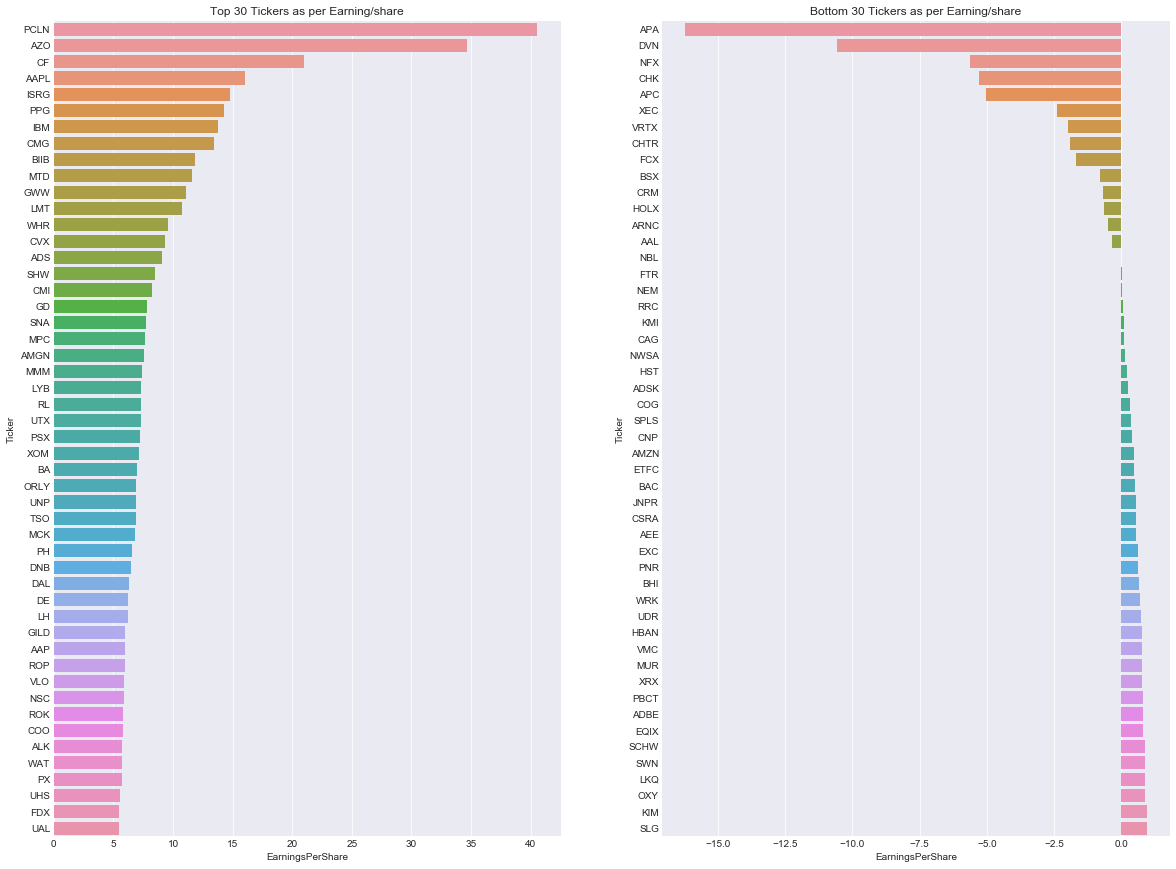

In [144]:
symbols['Ticker'] = symbols.index
bottom30 = symbols.sort_values(by = 'EarningsPerShare').head(50)
top30 = symbols.dropna().sort_values(by = 'EarningsPerShare',ascending=False).head(50)

fig = plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.title('Top 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'EarningsPerShare', data = top30)
plt.subplot(1,2,2)
plt.title('Bottom 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'EarningsPerShare', data = bottom30)

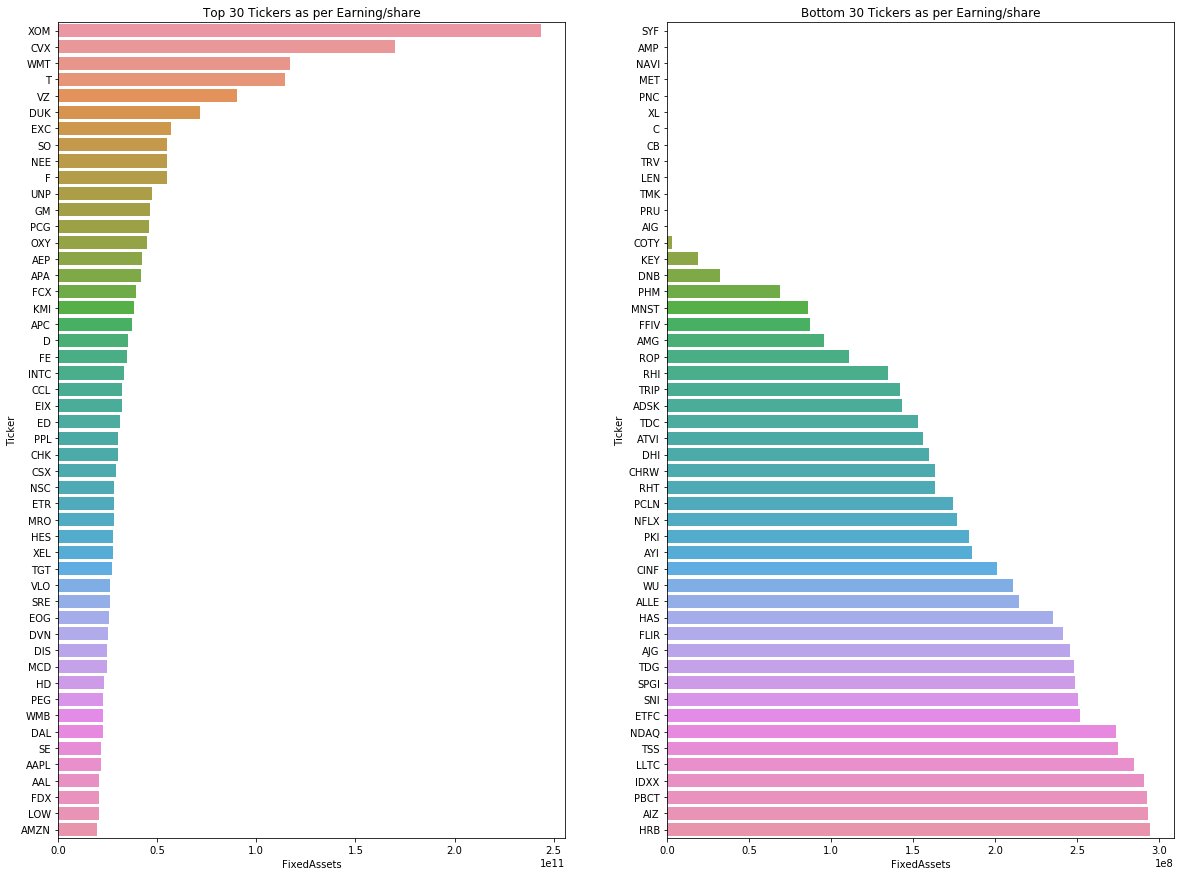

In [56]:

symbols['Ticker'] = symbols.index
bottom20 = symbols.sort_values(by = 'FixedAssets').head(50)
top20 = symbols.dropna().sort_values(by = 'FixedAssets',ascending=False).head(50)

fig = plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.title('Top 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'FixedAssets', data = top30)
plt.subplot(1,2,2)
plt.title('Bottom 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'FixedAssets', data = bottom30)

Here we have the the graph of companies with higher number of fixed assets and lower number of fixed assets. Just to be clear the amount of fixed assets does not tell about the health of the company in stock trading.

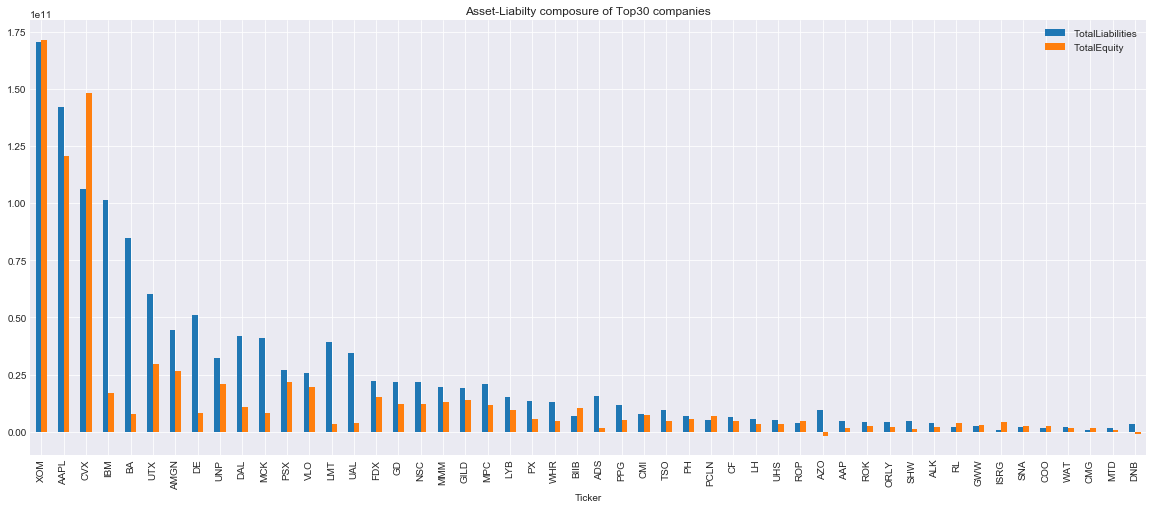

In [146]:
top30.sort_values(by = 'TotalAssets',
                  ascending=False).plot(x='Ticker',y=['TotalLiabilities','TotalEquity']
                                        ,kind='bar',figsize = (20,8),title='Asset-Liabilty composure'
                                        +' of Top30 companies')

In this graph we have plotted the total liabilities and total equities for top 30 companies. To be a company to be healthy one of the condition is where the equity is larger thatn the liabilities, if the liabaility is higher then the company is running on loans and its not good.

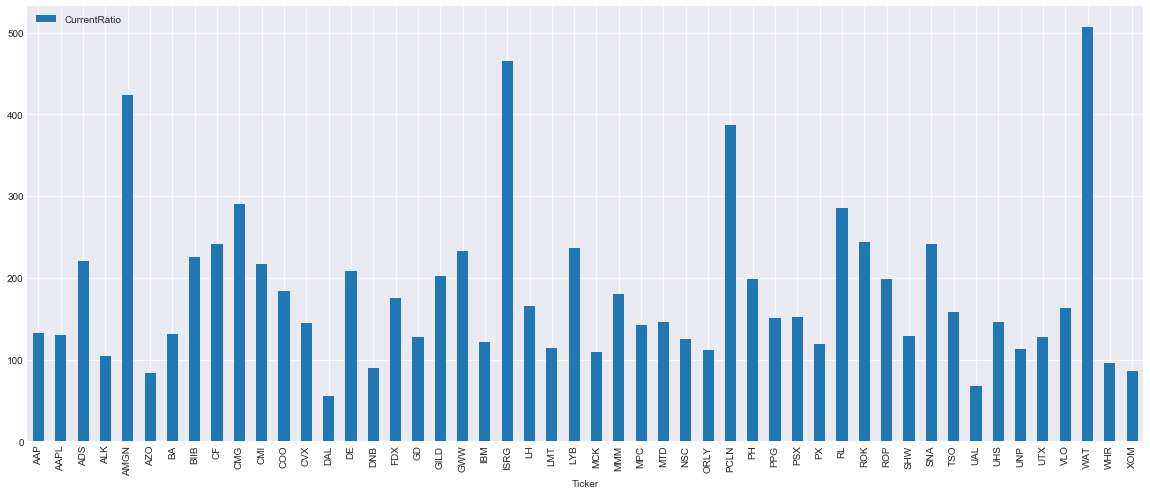

In [148]:
top30.sort_values(by = 'Ticker',
                  ascending=True).plot(x='Ticker',y=['CurrentRatio']
                                        ,kind='bar',figsize = (20,8))

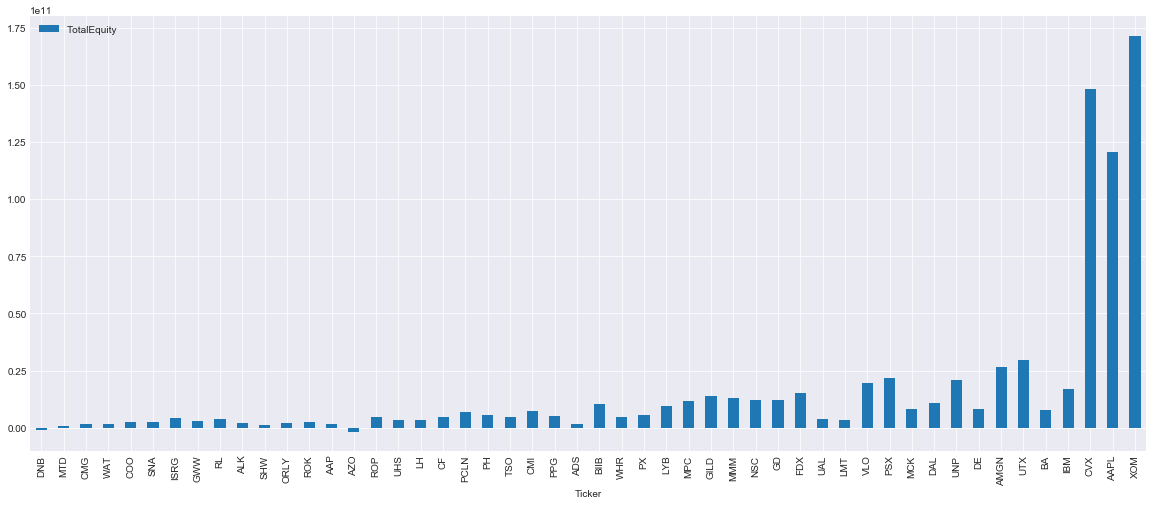

In [149]:
top30.sort_values(by = 'TotalAssets',
                  ascending=True).plot(x='Ticker',y=['TotalEquity']
                                        ,kind='bar',figsize = (20,8))

In [150]:
fundamentals['Score_diff'] = fundamentals['TotalEquity'] - fundamentals['TotalLiabilities'] 

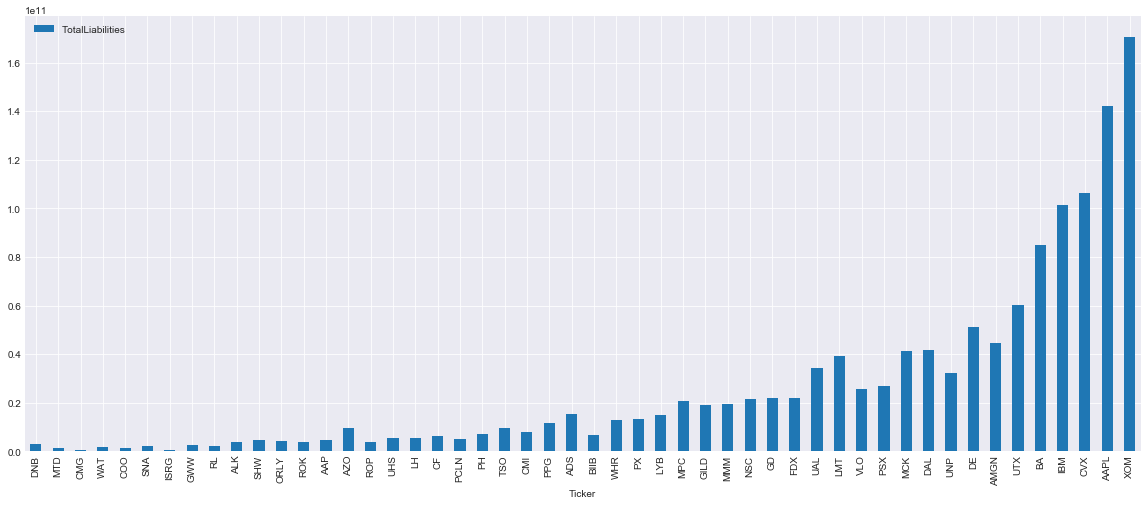

In [151]:
top30.sort_values(by = 'TotalAssets',
                  ascending=True).plot(x='Ticker',y=['TotalLiabilities']
                                        ,kind='bar',figsize = (20,8))

In [156]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

np.random.seed(4)

lstm_input = Input(shape=(lookback, len(features)), name='lstm_input')
x = LSTM(units=64, return_sequences=False, return_state=False)(lstm_input)  
x = Dropout(0.2)(x)
x = Dense(units=32, activation='relu')(x)
output = Dense(1, activation='linear')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

weights = model.get_weights()  # needed to reset the model 

model.summary()
#from keras.utils import plot_model
#plot_model(model) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 120, 8)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                18688     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


I have selected 7 healthy companies from the above analysis and i am going to build the model based on these company's data.

In [13]:
#Chaning the column name for easy analysis
security = security.rename(columns={"Ticker symbol": "tickers"})

In [38]:
#Filtering and creating a new dataset by taking only the data of the companies required from security dataset.
names = ['CVX', 'AAPL','CCL', 'HES', 'INTC', 'MRO', 'EOG']
security.tickers.isin(names)
data_sep = security[security.tickers.isin(names)]

In [39]:
data_sep

,tickers,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
45,AAPL,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193
85,CCL,Carnival Corp.,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",NaN,815097
98,CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",NaN,93410
166,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",NaN,821189
226,HES,Hess Corporation,reports,Energy,Integrated Oil & Gas,"New York, New York",1984-05-31,4447
240,INTC,Intel Corp.,reports,Information Technology,Semiconductors,"Santa Clara, California",1976-12-31,50863
287,MRO,Marathon Oil Corp.,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1991-05-01,101778


In [40]:
#Filtering and creating a new dataset by taking only the data of the companies required from prices_split dataset.
data_prices = prices_split[prices_split.symbol.isin(names)]

In [41]:
data_prices.shape

(12334, 7)

In [42]:
data_prices.sample(10)

,date,symbol,open,close,low,high,volume
278014,2012-05-08,MRO,25.910000,26.170000,25.510000,26.290001,12392600.0
482068,2014-01-16,HES,77.739998,77.720001,77.169998,78.029999,3237900.0
265502,2012-03-30,AAPL,86.967140,85.650002,85.419998,87.222855,182759500.0
171725,2011-06-15,INTC,21.680000,21.420000,21.400000,21.830000,48556700.0
479220,2014-01-08,MRO,34.720001,34.400002,34.080002,34.750000,5510000.0
133166,2011-02-16,HES,81.599998,83.839996,81.410004,83.980003,2651500.0
644140,2015-05-11,INTC,32.680000,32.689999,32.430000,32.709999,18358600.0
298694,2012-07-11,MRO,24.170000,24.639999,24.170000,24.950001,8095800.0
161632,2011-05-16,AAPL,48.457142,47.614285,47.514286,48.745716,112443800.0
44082,2010-05-18,MRO,19.231206,19.237167,19.117867,19.571219,23993200.0


In [45]:
data_sep['GICS Sub Industry'].value_counts()

Integrated Oil & Gas                  2
Oil & Gas Exploration & Production    2
Hotels, Resorts & Cruise Lines        1
Semiconductors                        1
Computer Hardware                     1
Name: GICS Sub Industry, dtype: int64

In [46]:
#Changing the column name to symbol for merging
data_sep = data_sep.rename(columns={"tickers": "symbol"})

In [47]:
#merging the two datsets.
merged = pd.merge(data_sep, data_prices, on='symbol')

In [50]:
merged.shape

(12334, 14)

In [55]:
merged.sample(10)

,symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,date,open,close,low,high,volume
4877,CVX,Chevron Corp.,reports,Energy,1,"San Ramon, California",NaN,93410,2015-05-20,105.419998,105.250000,104.760002,105.900002,6521200.0
11124,MRO,Marathon Oil Corp.,reports,Energy,2,"Houston, Texas",1991-05-01,101778,2012-03-13,33.860001,33.990002,33.320000,34.029999,4961800.0
870,AAPL,Apple Inc.,reports,Information Technology,5,"Cupertino, California",1982-11-30,320193,2013-06-19,61.628571,60.428570,60.428570,61.665714,77735000.0
5098,CVX,Chevron Corp.,reports,Energy,1,"San Ramon, California",NaN,93410,2016-04-06,93.150002,94.839996,92.820000,95.000000,6836400.0
10077,INTC,Intel Corp.,reports,Information Technology,4,"Santa Clara, California",1976-12-31,50863,2015-01-15,36.529999,36.189999,36.029999,36.880001,47181800.0
7063,HES,Hess Corporation,reports,Energy,1,"New York, New York",1984-05-31,4447,2010-01-26,59.110001,59.090000,58.419998,60.419998,4413900.0
2714,CCL,Carnival Corp.,reports,Consumer Discretionary,3,"Miami, Florida",NaN,815097,2013-10-15,31.889999,31.959999,31.840000,32.310001,4096900.0
10444,INTC,Intel Corp.,reports,Information Technology,4,"Santa Clara, California",1976-12-31,50863,2016-06-30,32.000000,32.799999,31.969999,32.880001,34528900.0
7871,HES,Hess Corporation,reports,Energy,1,"New York, New York",1984-05-31,4447,2013-04-12,72.150002,71.389999,70.699997,72.150002,1897100.0
4370,CVX,Chevron Corp.,reports,Energy,1,"San Ramon, California",NaN,93410,2013-05-15,123.730003,123.010002,122.599998,123.730003,7950400.0


In [54]:
#Assigning a number to the industry 
mapping = {'Integrated Oil & Gas': 1, 'Oil & Gas Exploration & Production': 2, 'Hotels, Resorts & Cruise Lines': 3, 'Semiconductors': 4, 'Computer Hardware': 5 }
merged['GICS Sub Industry'] = merged['GICS Sub Industry'].map(mapping)

In [58]:
#Droppping unwanted columns
merged = merged.drop(['Date first added','SEC filings', 'GICS Sector','Address of Headquarters'], axis=1)

In [59]:
merged.head(10)

,symbol,Security,GICS Sub Industry,CIK,date,open,close,low,high,volume
0,AAPL,Apple Inc.,5,320193,2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
1,AAPL,Apple Inc.,5,320193,2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2,AAPL,Apple Inc.,5,320193,2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
3,AAPL,Apple Inc.,5,320193,2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
4,AAPL,Apple Inc.,5,320193,2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0
5,AAPL,Apple Inc.,5,320193,2010-01-11,30.400000,30.015715,29.778572,30.428572,115557400.0
6,AAPL,Apple Inc.,5,320193,2010-01-12,29.884285,29.674286,29.488571,29.967142,148614900.0
7,AAPL,Apple Inc.,5,320193,2010-01-13,29.695715,30.092857,29.157143,30.132856,151473000.0
8,AAPL,Apple Inc.,5,320193,2010-01-14,30.015715,29.918571,29.860001,30.065714,108223500.0
9,AAPL,Apple Inc.,5,320193,2010-01-15,30.132856,29.418571,29.410000,30.228571,148516900.0


In [60]:
merged['symbol'].value_counts()

CVX     1762
AAPL    1762
MRO     1762
CCL     1762
EOG     1762
INTC    1762
HES     1762
Name: symbol, dtype: int64

In [61]:
merged.tail(10)

,symbol,Security,GICS Sub Industry,CIK,date,open,close,low,high,volume
12324,MRO,Marathon Oil Corp.,2,101778,2016-12-16,18.340000,18.590000,18.219999,19.020000,20606500.0
12325,MRO,Marathon Oil Corp.,2,101778,2016-12-19,18.650000,18.510000,18.299999,18.700001,10731700.0
12326,MRO,Marathon Oil Corp.,2,101778,2016-12-20,18.610001,18.309999,18.240000,18.790001,10116000.0
12327,MRO,Marathon Oil Corp.,2,101778,2016-12-21,18.559999,18.080000,18.049999,18.590000,8167300.0
12328,MRO,Marathon Oil Corp.,2,101778,2016-12-22,18.120001,18.040001,18.000000,18.350000,9169500.0
12329,MRO,Marathon Oil Corp.,2,101778,2016-12-23,17.980000,18.059999,17.940001,18.200001,7624400.0
12330,MRO,Marathon Oil Corp.,2,101778,2016-12-27,18.100000,18.139999,18.000000,18.200001,5384100.0
12331,MRO,Marathon Oil Corp.,2,101778,2016-12-28,18.110001,17.850000,17.840000,18.290001,8333800.0
12332,MRO,Marathon Oil Corp.,2,101778,2016-12-29,17.780001,17.570000,17.440001,17.830000,7020000.0
12333,MRO,Marathon Oil Corp.,2,101778,2016-12-30,17.570000,17.309999,17.209999,17.820000,7920500.0


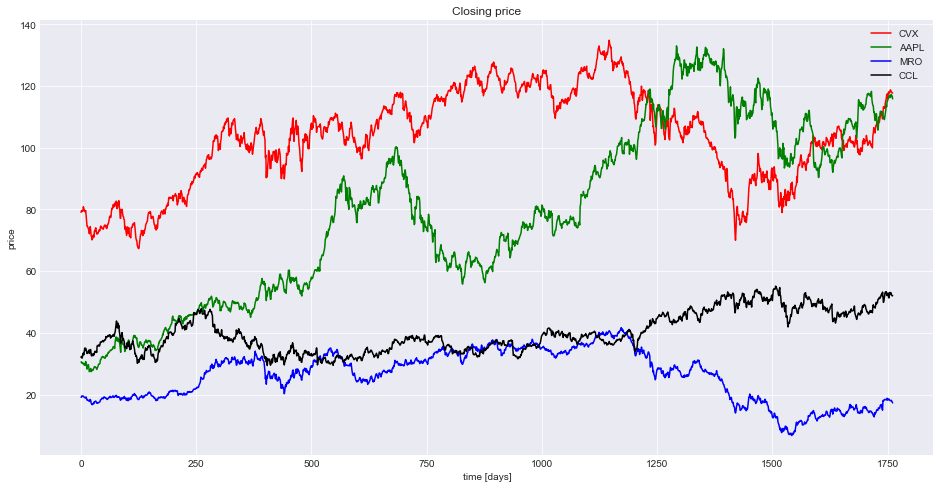

In [70]:
#Closing price of few selected companies
plt.figure(figsize=(16, 8));

plt.plot(merged[merged.symbol == 'CVX'].close.values, color='red', label='CVX')
plt.plot(merged[merged.symbol == 'AAPL'].close.values, color='green', label='AAPL')
plt.plot(merged[merged.symbol == 'MRO'].close.values, color='blue', label='MRO')
plt.plot(merged[merged.symbol == 'CCL'].close.values, color='black', label='CCL')
plt.title('Closing price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')


In [88]:
#We are chosing only close price for building the model since we want to predict the close price.
data_close = merged.filter(['close'])
dataset = data_close.values
#We are taking 80% of data fro training
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

9868

In [90]:
#Scaling the data - The data is scaled so that all the values are scaled to values betwen 0 and 1, which makes it easier for the model to understand the data.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18609784],
       [0.1865104 ],
       [0.18270816],
       ...,
       [0.08679363],
       [0.08460818],
       [0.08257882]])

In [93]:
#creating the train dataset
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
         print(x_train)
         print(y_train)
         print()

[array([0.18609784, 0.1865104 , 0.18270816, 0.18227331, 0.18383435,
       0.18174925, 0.17908433, 0.18235136, 0.18099103, 0.17708844,
       0.18724632, 0.18355559, 0.17947459, 0.16796752, 0.17389946,
       0.17709959, 0.17926274, 0.16968466, 0.16162303, 0.16460014,
       0.16586012, 0.16961775, 0.16161188, 0.16541411, 0.16391997,
       0.16622809, 0.16503501, 0.16899334, 0.17090003, 0.17426742,
       0.17331965, 0.17374336, 0.17233842, 0.17094464, 0.16719815,
       0.17121225, 0.17270639, 0.17562775, 0.18050042, 0.18034431,
       0.18087952, 0.18241826, 0.19160608, 0.19175102, 0.19614424,
       0.19817357, 0.1989095 , 0.20013603, 0.19705855, 0.19773871,
       0.19737076, 0.19796173, 0.19528566, 0.19807323, 0.20209846,
       0.20322465, 0.20019177, 0.20493063, 0.20659202, 0.21045   ])]
[0.20950225480632587]

[array([0.18609784, 0.1865104 , 0.18270816, 0.18227331, 0.18383435,
       0.18174925, 0.17908433, 0.18235136, 0.18099103, 0.17708844,
       0.18724632, 0.18355559, 0.17

In [94]:
#converting train datasets to array
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping the data to input the data into LSTM model.
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(9808, 60, 1)

In [99]:
#Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [102]:
#Running the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [103]:
model.fit(x_train, y_train, batch_size=1, epochs= 1)

Epoch 1/1
9808/9808 [==============================] - 1629s 166ms/step - loss: 0.0010


In [105]:
#creating the test dataset
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [106]:
#converting test data into array
x_test = np.array(x_test)

In [108]:
#making the data 3d 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [109]:
#Predicted closing rates
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [113]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5997325434381283

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


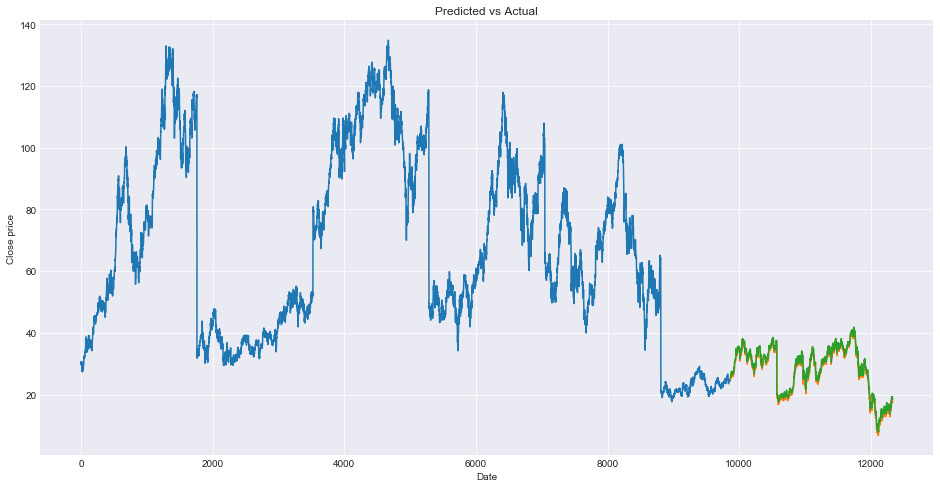

In [116]:
train = merged[:training_data_len]
valid = merged[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.show()

In [119]:
#predicted values
valid

,symbol,Security,GICS Sub Industry,CIK,date,open,close,low,high,volume,Predictions
9868,INTC,Intel Corp.,4,50863,2014-03-19,24.850000,25.020000,24.770000,25.250000,34229400.0,25.391380
9869,INTC,Intel Corp.,4,50863,2014-03-20,25.000000,25.430000,24.940001,25.590000,37009100.0,25.564602
9870,INTC,Intel Corp.,4,50863,2014-03-21,25.610001,25.170000,25.160000,25.680000,56861900.0,25.891706
9871,INTC,Intel Corp.,4,50863,2014-03-24,25.209999,25.120001,24.920000,25.379999,36950600.0,25.838924
9872,INTC,Intel Corp.,4,50863,2014-03-25,25.190001,25.459999,25.170000,25.670000,32317400.0,25.767370
9873,INTC,Intel Corp.,4,50863,2014-03-26,25.590000,25.379999,25.320000,25.740000,26442800.0,25.963362
9874,INTC,Intel Corp.,4,50863,2014-03-27,25.360001,25.309999,25.290001,25.750000,27201100.0,25.992453
9875,INTC,Intel Corp.,4,50863,2014-03-28,25.410000,25.620001,25.320000,25.809999,22884500.0,25.949070
9876,INTC,Intel Corp.,4,50863,2014-03-31,25.650000,25.809999,25.620001,26.059999,29336300.0,26.133009
9877,INTC,Intel Corp.,4,50863,2014-04-01,25.799999,25.990000,25.639999,26.000000,23778700.0,26.331097


# We are going to predict the closing price of MRO for the date Jan - 03 - 2017 , since that is the next trading day after Dec - 30 - 2016.

In [121]:
#Created a dataset with the data of MRO
names_new = ['MRO']
merged.symbol.isin(names_new)
mro_data = merged[merged.symbol.isin(names_new)]

In [122]:
mro_data

,symbol,Security,GICS Sub Industry,CIK,date,open,close,low,high,volume
10572,MRO,Marathon Oil Corp.,2,101778,2010-01-04,18.938916,19.153657,18.867336,19.189456,9214200.0
10573,MRO,Marathon Oil Corp.,2,101778,2010-01-05,19.231206,19.171557,19.105946,19.290857,9483300.0
10574,MRO,Marathon Oil Corp.,2,101778,2010-01-06,19.153657,19.595068,19.094016,19.624897,15233800.0
10575,MRO,Marathon Oil Corp.,2,101778,2010-01-07,19.535417,19.475778,19.219277,19.535417,7803000.0
10576,MRO,Marathon Oil Corp.,2,101778,2010-01-08,19.374366,19.505598,19.296826,19.565248,7585200.0
10577,MRO,Marathon Oil Corp.,2,101778,2010-01-11,19.666659,19.505598,19.350507,19.714367,10013000.0
10578,MRO,Marathon Oil Corp.,2,101778,2010-01-12,19.284896,19.237167,19.165597,19.374366,9018100.0
10579,MRO,Marathon Oil Corp.,2,101778,2010-01-13,19.225236,19.171557,18.867336,19.255067,9795900.0
10580,MRO,Marathon Oil Corp.,2,101778,2010-01-14,19.249097,19.070157,18.950846,19.249097,8469500.0
10581,MRO,Marathon Oil Corp.,2,101778,2010-01-15,19.034356,18.873307,18.497504,19.034356,14417000.0


In [126]:
new_mro = mro_data.filter(['close'])
last_60_days = new_mro[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[18.18084]]


# We got the predicted closing rate as 18.18, which is not 100% accurate but is very close to the actual closed price on 03/01/2017. The data for 03/01/2017 is available in yahoo finance.

In [133]:
#Predicting the stock for APPLE
names_new = ['AAPL']
merged.symbol.isin(names_new)
aapl_data = merged[merged.symbol.isin(names_new)]

In [136]:
aapl_data.tail(5)

,symbol,Security,GICS Sub Industry,CIK,date,open,close,low,high,volume
1756,AAPL,Apple Inc.,5,320193,2016-12-22,116.349998,116.290001,115.639999,116.510002,26085900.0
1757,AAPL,Apple Inc.,5,320193,2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500.0
1758,AAPL,Apple Inc.,5,320193,2016-12-27,116.519997,117.260002,116.489998,117.800003,18296900.0
1759,AAPL,Apple Inc.,5,320193,2016-12-28,117.519997,116.760002,116.199997,118.019997,20905900.0
1760,AAPL,Apple Inc.,5,320193,2016-12-29,116.449997,116.730003,116.400002,117.110001,15039500.0


In [135]:
#Going to predict the stock for 30 Dec 2016, so deleting the last row.
aapl_data = aapl_data[:-1]

In [137]:
new_aapl = aapl_data.filter(['close'])
last_60_days = new_aapl[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[116.74445]]
